# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [124]:
import pandas as pd
import matplotlib.pyplot as plt


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [125]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=3e4, na_values=['Unknown', "UNKNOWN", "unknown", "NO NAME"])

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [126]:
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

# Description

- Each row is a dog.

- Columns
    - `Owner Zip Code` : is the ZIP Code of the dog's owner
    - `Animal Gender` : is the dog's gender in M or F
    - `Primary Breef` : is the dog's primary breed 

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [127]:
# How are the dogs distrbuted geographicaly (ZIP codes) ?

# What is the proportion of dog that are vaccinated ?

# How much dogs have an expired license ?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

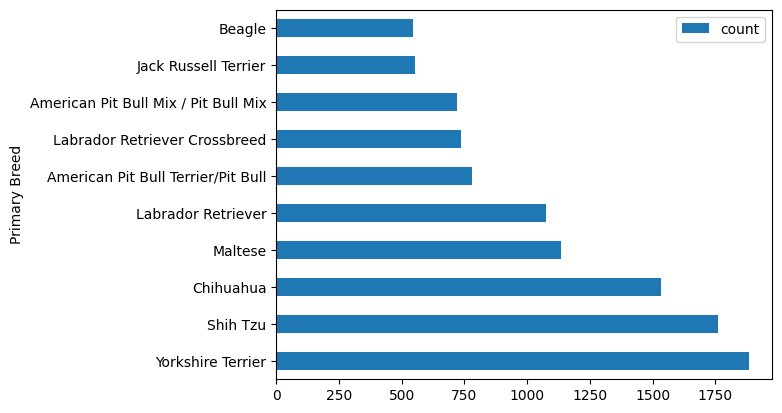

In [128]:
df.groupby('Primary Breed').size().reset_index(name='count').sort_values('count', ascending=False).head(n=10).plot(kind = "barh", x='Primary Breed')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

<Axes: ylabel='Primary Breed'>

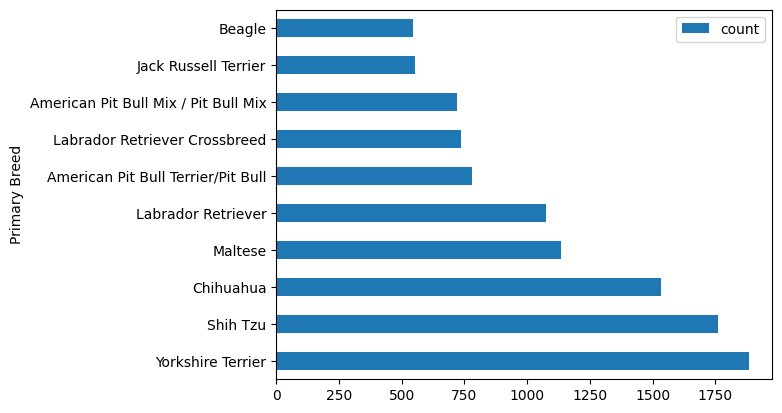

In [129]:
# I reimport the excel with na_values=['Unknown'] / but this would be the filtering

df[df['Primary Breed'] != 'Unknown'].groupby('Primary Breed').size().reset_index(name='count').sort_values('count', ascending=False).head(n=10).plot(kind = "barh", x='Primary Breed')

## What are the most popular dog names?

<Axes: ylabel='Animal Name'>

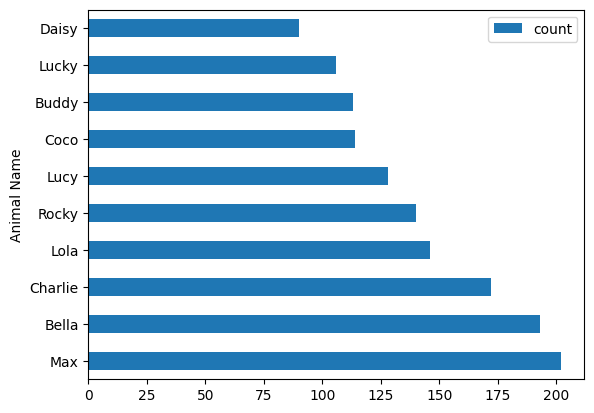

In [130]:
df.groupby('Animal Name').size().reset_index(name='count').sort_values('count', ascending=False).head(n=10).plot(kind = "barh", x='Animal Name')

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [131]:
df[df['Animal Name'].str.contains("Olaf", case=False, na=False)]
df['Animal Name'].str.contains("Olaf", case=False, na=False).sum()

np.int64(3)

In [132]:
# df[df['Animal Name'].str.fullmatch("Max", case=False, na=False)]
df['Animal Name'].str.fullmatch("Max", case=False, na=False).sum()


np.int64(256)

In [133]:
# df[df['Animal Name'].str.fullmatch("Maxwell", case=False, na=False)]
df['Animal Name'].str.fullmatch("Maxwell", case=False, na=False).sum()


np.int64(13)

## What percentage of dogs are guard dogs?

In [134]:
df.groupby('Guard or Trained').size()
df['Guard or Trained'].value_counts(normalize=True) * 100

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [135]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [136]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [137]:
df['Guard or Trained'].fillna("No").value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [138]:
(
    df[df['Guard or Trained'] == "Yes"]
    .groupby('Primary Breed')
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

,Primary Breed,count
2,German Shepherd Dog,3
0,Doberman Pinscher,1
1,German Shepherd Crossbreed,1
3,Golden Retriever,1
4,Labrador Retriever,1
5,"Poodle, Standard",1
6,Rottweiler,1
7,"Schnauzer, Miniature",1
8,Shih Tzu,1
9,Yorkshire Terrier,1


## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [139]:
df['year'] = df['Animal Birth'].dt.year
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [140]:
df['age'] = 2025 - df['year']
df['age'].mean()

np.float64(15.712433333333333)

# Joining data together

In [141]:
df_zip = pd.read_csv("zipcodes-neighborhoods.csv")
df_zip

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [142]:
merged = df.merge(df_zip, how='left', left_on="Owner Zip Code", right_on="zip")
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,NaN,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,15,West Queens,11372.0,Queens
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,15,Southwest Queens,11417.0,Queens
29997,11228,NaN,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,11,Southwest Brooklyn,11228.0,Brooklyn
29998,11217,daisy,F,NaN,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,16,Northwest Brooklyn,11217.0,Brooklyn


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [ ]:
top5_borough = (
    merged.groupby(['borough', 'Animal Name'])
      .size()
      .reset_index(name='n')
      .sort_values(['borough', 'n'], ascending=[True, False])
      .groupby('borough')
      .head(5)
)

In [144]:
top5_borough[top5_borough['borough'] == 'Bronx']

,borough,Animal Name,n
170,Bronx,Bella,22
1127,Bronx,Max,21
1481,Bronx,Rocky,20
1018,Bronx,Lucky,15
1399,Bronx,Princess,15


In [145]:
top5_borough[top5_borough['borough'] == 'Brooklyn']

,borough,Animal Name,n
4578,Brooklyn,Max,46
2417,Brooklyn,Bella,45
2866,Brooklyn,Charlie,42
5407,Brooklyn,Rocky,36
4308,Brooklyn,Lucky,32


In [146]:
top5_neighborhood = (
    merged.groupby(['neighborhood', 'Animal Name'])
      .size()
      .reset_index(name='n')
      .sort_values(['neighborhood', 'n'], ascending=[True, False])
      .groupby('neighborhood')
      .head(5)
)

In [147]:
top5_neighborhood[top5_neighborhood['neighborhood'] == 'Upper East Side']

,neighborhood,Animal Name,n
20135,Upper East Side,Charlie,19
20010,Upper East Side,Bella,12
20577,Upper East Side,Lola,10
20592,Upper East Side,Lucy,10
20067,Upper East Side,Buddy,9


## What is the most common dog breed in each of the neighborhoods of NYC?

In [150]:
top_breeding_neighborhood = (
    merged.groupby(['neighborhood', 'Primary Breed'])
      .size()
      .reset_index(name='n')
      .sort_values(['neighborhood', 'n'], ascending=[True, False])
      .groupby('neighborhood')
      .head(1)
)

In [153]:
top_breeding_neighborhood

,neighborhood,Primary Breed,n
97,Borough Park,Yorkshire Terrier,49
158,Bronx Park and Fordham,Yorkshire Terrier,39
259,Bushwick and Williamsburg,Yorkshire Terrier,47
340,Canarsie and Flatlands,Shih Tzu,56
403,Central Bronx,Yorkshire Terrier,29
505,Central Brooklyn,Shih Tzu,52
549,Central Harlem,Chihuahua,48
675,Central Queens,Yorkshire Terrier,34
713,Chelsea and Clinton,Chihuahua,80
897,East Harlem,Yorkshire Terrier,44


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [173]:
(
    df.groupby(['Primary Breed', 'Spayed or Neut'])
      .size()
      .reset_index(name='n')
      .assign(
          proportion = lambda d: d.groupby('Primary Breed')['n']
                                 .transform(lambda x: x / x.sum() * 100)
      )
      .query("`Spayed or Neut` == 'No'")
      .sort_values('proportion', ascending=False)
      .head(10)
)

,Primary Breed,Spayed or Neut,n,proportion
275,Mudi,No,1,100.0
265,"Mastiff, Tibetan",No,3,100.0
160,Dogo Argentino,No,1,100.0
398,Treeing Tennessee Brindle,No,2,100.0
228,Karelian Bear Dog,No,1,100.0
233,Kooikerhondje,No,1,100.0
96,Canaan Dog,No,1,100.0
180,French Spaniel,No,1,100.0
174,Fila Brasileiro,No,1,100.0
307,Polish Hound,No,2,100.0


In [174]:
(
    df.groupby(['Animal Gender', 'Spayed or Neut'])
      .size()
      .reset_index(name='n')
      .assign(
          proportion = lambda d: d.groupby('Animal Gender')['n']
                                 .transform(lambda x: x / x.sum() * 100)
      )
      .query("`Spayed or Neut` == 'No'")
      .sort_values('proportion', ascending=False)
      .head(10)
)


,Animal Gender,Spayed or Neut,n,proportion
3,M,No,3384,20.814368
1,F,No,1953,14.215008


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

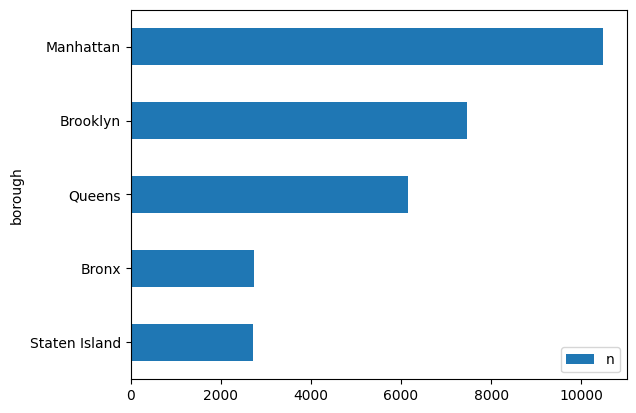

In [184]:
(
    merged.groupby(['borough'])
    .size()
    .reset_index(name='n')
    .sort_values('n', ascending = True)
    .plot(kind = 'barh', x='borough')
)

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
pop = pd.read_csv("boro_population.csv")
pop

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


<Axes: ylabel='borough'>

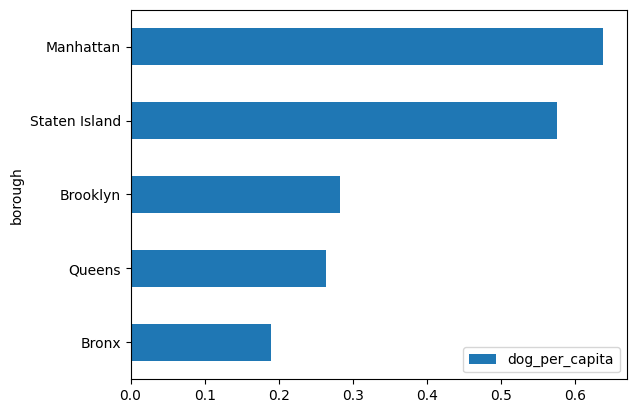

In [ ]:
(
    merged.groupby(['borough'])
    .size()
    .reset_index(name='dogs_tot')
    .merge(pop, how='left', left_on='borough', right_on='borough')
    .assign(
        dog_per_capita = lambda d: d['dogs_tot'] / d['population'] * 100
    )
    .sort_values('dog_per_capita', ascending=True)
    .plot(kind='barh', x= 'borough', y = 'dog_per_capita')
)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [208]:
import altair as alt

top5_breed_borough = (
    merged.groupby(['borough', 'Primary Breed'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .groupby('borough', group_keys=False)
    .head(5)
)

alt.Chart(top5_breed_borough).mark_bar().encode(
    x=alt.X('borough:N', title='Borough'),
    y=alt.Y('count:Q', title='Number of Dogs'),
    color='Primary Breed:N',
    xOffset='Primary Breed:N',
    tooltip=['borough', 'Primary Breed', 'count']
).properties(
    width=600,
    height=400,
)

chart


alt.Chart(...)